<a href="https://colab.research.google.com/github/divyat-thv/Codveda1/blob/main/time_series_aapl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

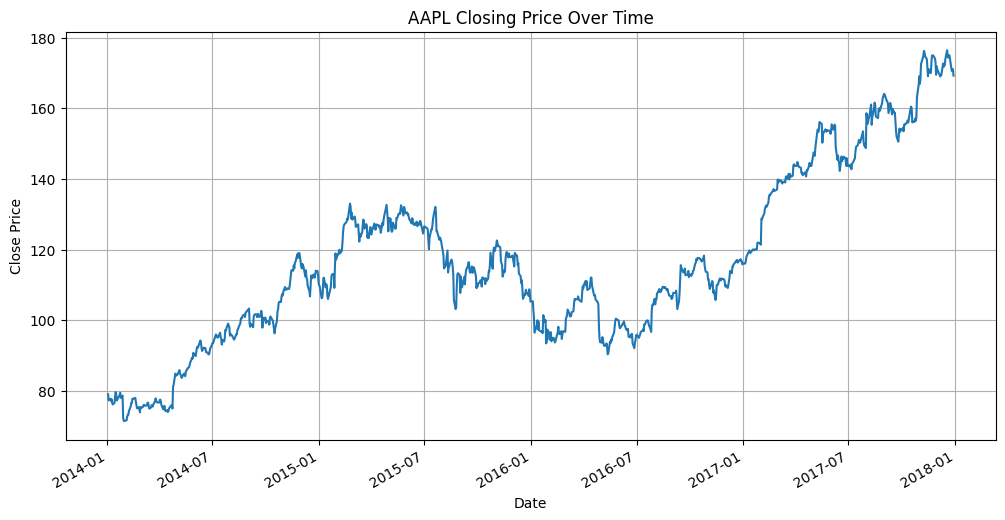

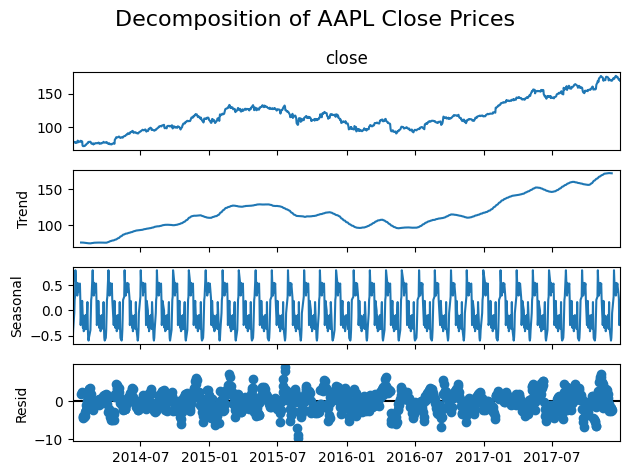

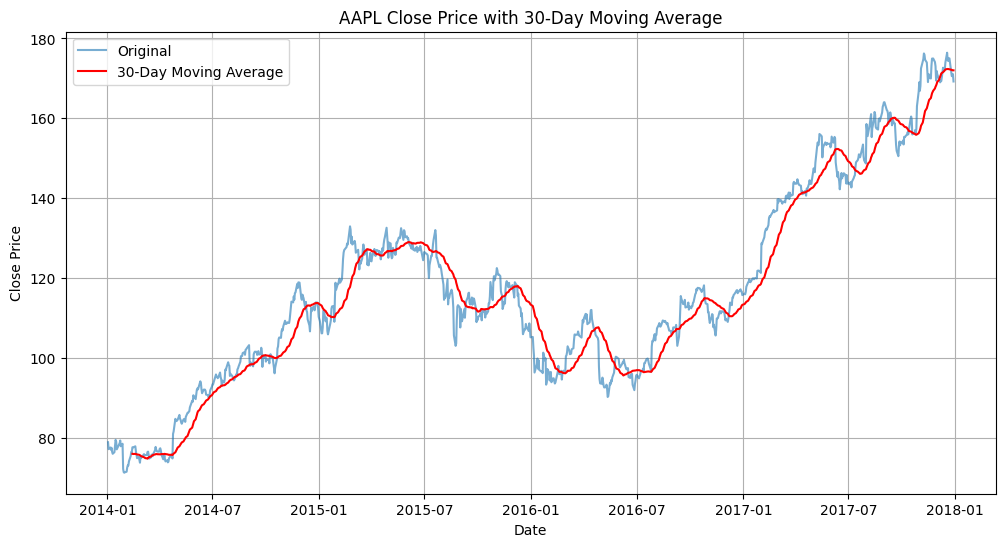

<Figure size 640x480 with 0 Axes>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load the dataset
df = pd.read_csv('2) Stock Prices Data Set.csv')

# Drop missing values
df.dropna(inplace=True)

# Filter for one stock and create a copy
df = df[df['symbol'] == 'AAPL'].copy()

# Convert 'date' to datetime
df['date'] = pd.to_datetime(df['date'])

# Sort by date
df.sort_values('date', inplace=True)

# Set date as index
df.set_index('date', inplace=True)

# Plot closing price over time
plt.figure(figsize=(12, 6))
df['close'].plot()
plt.title('AAPL Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()

# Decompose the time series
result = seasonal_decompose(df['close'], model='additive', period=30)
result.plot()
plt.suptitle('Decomposition of AAPL Close Prices', fontsize=16)
plt.tight_layout()
plt.show()

# Moving average
df['moving_avg'] = df['close'].rolling(window=30).mean()

# Plot with moving average
plt.figure(figsize=(12, 6))
plt.plot(df['close'], label='Original', alpha=0.6)
plt.plot(df['moving_avg'], label='30-Day Moving Average', color='red')
plt.title('AAPL Close Price with 30-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()
